### Descriptive statistics and correlation of predictors (no data editing)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, kstest

In [3]:
# ***** LOAD DATAFRAME: df2 *****

path = "C:/Users/Aleksi/ownCloud/Vaasan Yliopisto/Gradu/Python codes/FIN/New_Version/"
df2 = pd.read_csv(filepath_or_buffer=path+'df2.txt')
df2.drop('Unnamed: 0',inplace=True,axis=1)

b = df2['status']==1 # mask for bankrupt
h = df2['status']==0 # mask for healthy/active

In [4]:
def descriptive_stat(df):
    """This function returns a descriptive statistics from
    columns of DataFrame: returns df object"""
    
    desc = df.describe()
    desc.loc['median',:] = 0              # create empty row for median
    ind = desc.index                      # get indexes
    order = [0,1,len(ind)-1,2,3,4,5,6,7]  # create order for indexes
    ind = [ind[i] for i in order]         # edit the original list
    desc = desc.reindex(ind)              # reindex the df
    
    for col in df:
        desc.loc['median',col] = df.loc[:,col].median()
        
    return round(desc,3)
    

In [36]:
# ****** KOLMOGOROV-SMIRNOV TEST *****
#
# KS tests the equality of the distributions

# kstest()


In [47]:
# ***** MANN WHITNEY U TEST *****
#
# The Mann-Whitney U-test tests the equality of medians

x_pred = ['X1','X2','X3','X4'] 
mann_results = pd.DataFrame(columns=['Value','p-value'],index=x_pred)

for i in range(len(t_0)):

    mann_w = mannwhitneyu(df2.loc[b,x_pred[i]],df2.loc[h,x_pred[i]])
    mann_results.iloc[i,0] = round(mann_w[0],2)
    mann_results.iloc[i,1] = mann_w[1]    
    
print(mann_results)
mann_results.to_csv('mann.txt')

          Value      p-value
X1  9.93135e+07  2.64416e-61
X2  5.70585e+07            0
X3  6.31954e+07            0
X4    4.228e+07            0


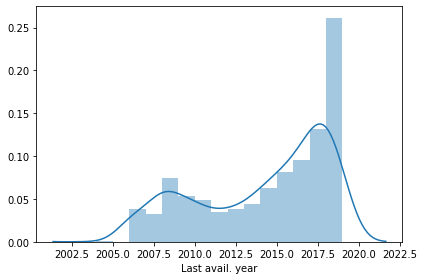

In [43]:
# ***** YEARS *****

fig, axes = plt.subplots(1,1,  sharex=True)

sns.distplot(df2.loc[b,'Last avail. year'])

plt.tight_layout()
plt.show()

### Correlation of predictors

In [63]:
# ***** CORRELATION OF PREDICTORS *****

df2.loc[:,x_pred].corr()


,X1,X2,X3,X4
X1,1.000000,-0.293350,0.249892,-0.002799
X2,-0.293350,1.000000,-0.974026,0.000052
X3,0.249892,-0.974026,1.000000,-0.000277
X4,-0.002799,0.000052,-0.000277,1.000000


In [62]:
pd.concat([ descriptive_stat(df2.loc[h,['X1','X2','X3','X4']]) ,
           
           descriptive_stat(df2.loc[b,['X1','X2','X3','X4']])]  ,axis=1)
           
           
           
           
           
           

,X1,X2,X3,X4,X1,X2,X3,X4
count,94400.000,94400.000,94400.000,94400.000,2595.000,2595.000,2595.000,2595.000
mean,0.133,-0.040,0.076,203.161,-0.072,0.521,-0.438,-0.066
median,0.062,-0.044,0.066,0.609,0.015,0.135,-0.096,-0.201
std,0.512,1.830,1.983,14953.499,0.808,3.806,3.640,1.989
min,-119.129,-349.217,-257.625,-6.333,-11.909,-4.000,-161.722,-1.000
25%,0.000,-0.138,0.000,0.101,-0.152,-0.007,-0.397,-0.516
50%,0.062,-0.044,0.066,0.609,0.015,0.135,-0.096,-0.201
75%,0.252,0.003,0.176,2.100,0.243,0.472,0.041,0.080
max,4.000,268.900,361.043,3149999.000,1.000,166.644,4.125,90.000
